In [6]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of data points in the dataset
num_data_points = 20

# Generate random names
names = ['John', 'Jane', 'Michael', 'Emma', 'David', 'Sophia', 'Daniel', 'Olivia', 'Matthew', 'Emily']
random_names = np.random.choice(names, size=num_data_points)

# Generate random ages between 18 and 65
random_ages = np.random.randint(low=18, high=66, size=num_data_points)

# Generate random incomes between 1000 and 5000
random_incomes = np.random.randint(low=1000, high=5001, size=num_data_points)

# Create the DataFrame
data = pd.DataFrame({'Name': random_names, 'Age': random_ages, 'Income': random_incomes})

# Display the generated dataset
print(data.head())


     Name  Age  Income
0  Daniel   38    3435
1    Emma   50    1600
2  Olivia   29    3363
3   David   39    3061
4  Daniel   61    1241


In [7]:
data.shape

(20, 3)

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

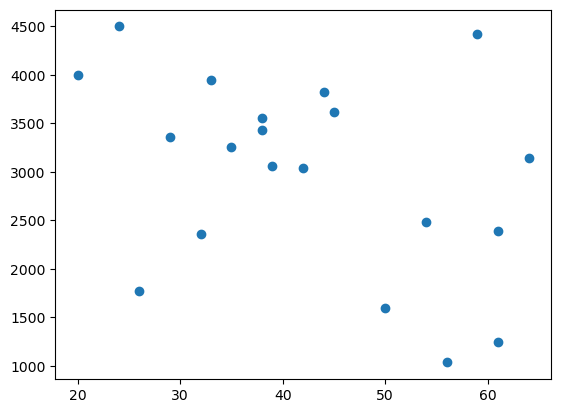

In [9]:
plt.scatter(data['Age'],data['Income'])

In [30]:
scaler = MinMaxScaler()
scaler.fit(data[['Income']])
data['Income']=scaler.transform(data['Income'].values.reshape(-1,1))
scaler.fit(data[['Age']])
data['Age']=scaler.transform(data['Age'].values.reshape(-1,1))
data

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Name,Age,Income,cluster
0,Daniel,0.409091,0.692929,0
1,Emma,0.681818,0.163348,1
2,Olivia,0.204545,0.672150,0
3,David,0.431818,0.584993,2
4,Daniel,0.931818,0.059740,1
5,Emily,0.500000,0.579221,2
6,Michael,0.545455,0.805195,0
7,Daniel,0.886364,0.976335,0
8,Olivia,0.568182,0.744012,0
9,David,0.295455,0.840115,0


In [49]:
km=KMeans(n_clusters=3)
y=km.fit_predict(data[['Age','Income']])
y

array([0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0])

In [47]:
data['cluster']=y
data.head()

,Name,Age,Income,cluster
0,Daniel,0.409091,0.692929,0
1,Emma,0.681818,0.163348,1
2,Olivia,0.204545,0.672150,0
3,David,0.431818,0.584993,0
4,Daniel,0.931818,0.059740,1


Text(0, 0.5, 'Income')

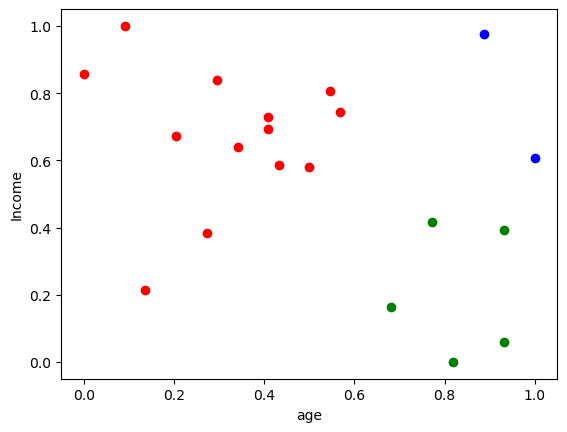

In [48]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
plt.scatter(df1['Age'],df1['Income'],color='red',label='cluster 0')
plt.scatter(df2['Age'],df2['Income'],color='green',label='cluster 1')
plt.scatter(df3['Age'],df3['Income'],color='blue',label='cluster 2')
plt.xlabel('age')
plt.ylabel('Income')

In [50]:
km.cluster_centers_

array([[0.32342657, 0.67239427],
       [0.89772727, 0.5979798 ],
       [0.81060606, 0.07436267]])

Text(0, 0.5, 'Income')

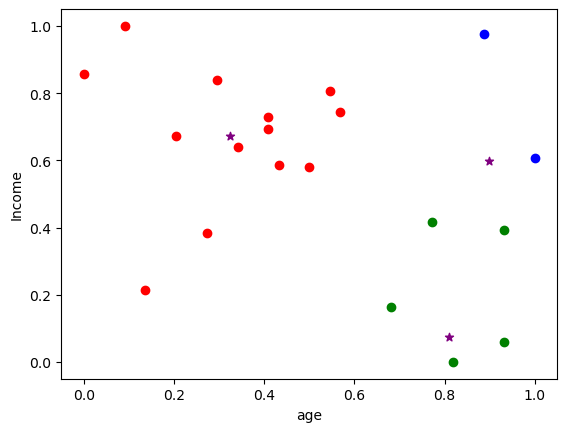

In [52]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
plt.scatter(df1['Age'],df1['Income'],color='red',label='cluster 0')
plt.scatter(df2['Age'],df2['Income'],color='green',label='cluster 1')
plt.scatter(df3['Age'],df3['Income'],color='blue',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('age')
plt.ylabel('Income')

In [54]:
kv = range(1,10)
ssc=[]
for k in kv:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income']])
    ssc.append(km.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
ssc

[3.3774153522443564,
 1.6146077461404196,
 1.1762014471285753,
 0.7975174145772992,
 0.4764749959321697,
 0.31163903045731534,
 0.23658766251118343,
 0.19444058099721884,
 0.15193432885857128]

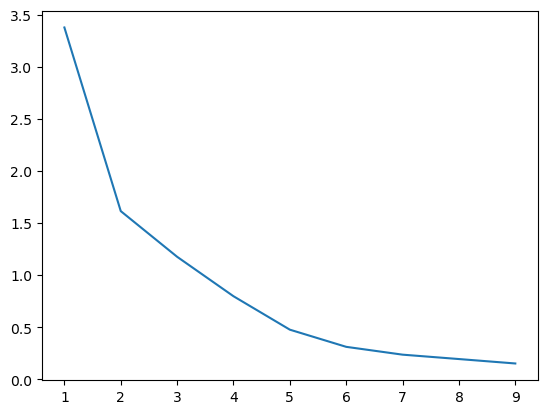

In [56]:
plt.plot(kv,ssc)

In [60]:
km=KMeans(n_clusters = 5)
y_pred=km.fit_predict(data[['Age','Income']])
y_pred

array([1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 4, 2, 0, 3, 0, 3, 1, 4, 0, 1])

In [61]:
data['cluster']=y_pred
data.head()

,Name,Age,Income,cluster
0,Daniel,0.409091,0.692929,1
1,Emma,0.681818,0.163348,0
2,Olivia,0.204545,0.672150,1
3,David,0.431818,0.584993,1
4,Daniel,0.931818,0.059740,0


Text(0, 0.5, 'Income')

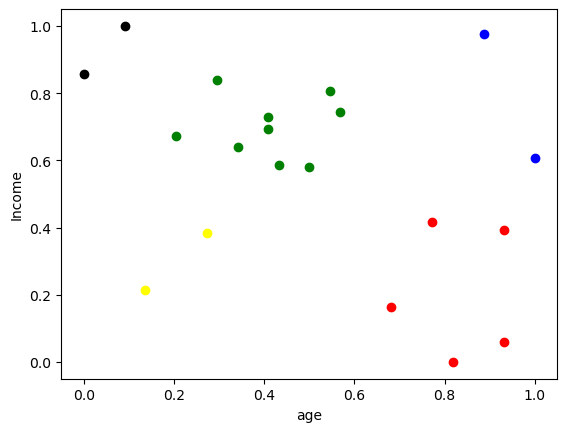

In [63]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
df4=data[data['cluster']==3]
df5=data[data['cluster']==4]
plt.scatter(df1['Age'],df1['Income'],color='red',label='cluster 0')
plt.scatter(df2['Age'],df2['Income'],color='green',label='cluster 1')
plt.scatter(df3['Age'],df3['Income'],color='blue',label='cluster 2')
plt.scatter(df4['Age'],df4['Income'],color='black',label='cluster 3')
plt.scatter(df5['Age'],df5['Income'],color='yellow',label='cluster 4')
plt.xlabel('age')
plt.ylabel('Income')

In [64]:
km.cluster_centers_

array([[0.82727273, 0.20623377],
       [0.41161616, 0.69854097],
       [0.94318182, 0.79191919],
       [0.04545455, 0.92842713],
       [0.20454545, 0.2987013 ]])

Text(0, 0.5, 'Income')

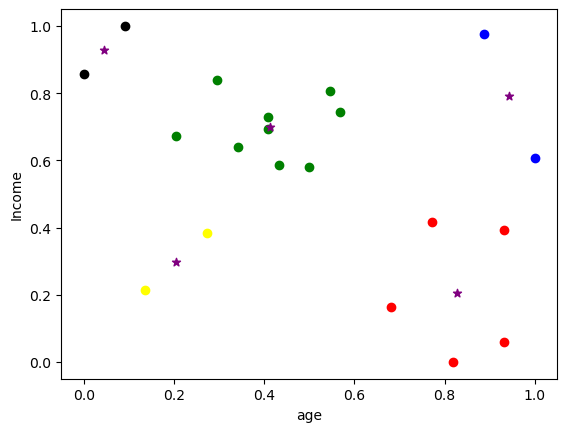

In [65]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
df4=data[data['cluster']==3]
df5=data[data['cluster']==4]
plt.scatter(df1['Age'],df1['Income'],color='red',label='cluster 0')
plt.scatter(df2['Age'],df2['Income'],color='green',label='cluster 1')
plt.scatter(df3['Age'],df3['Income'],color='blue',label='cluster 2')
plt.scatter(df4['Age'],df4['Income'],color='black',label='cluster 3')
plt.scatter(df5['Age'],df5['Income'],color='yellow',label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('age')
plt.ylabel('Income')